In [2]:
import torch
import torch.optim as optim
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
from densities import get_density
from losses import FreeEnergyBound
from flows import PlanarFlow, RadialFlow

In [13]:
density_func = get_density(1)
flow = RadialFlow(dim=2, K=2)
optimizer = optim.RMSprop(flow.parameters(), lr=1e-5)

In [14]:
# Training Loop

for i in trange(500000):
    optimizer.zero_grad()
    
    z = torch.randn(size=(100, 2))
    z_K, sum_logdets = flow(z)
    loss = FreeEnergyBound(z_K, sum_logdets, density_func)
    loss.backward()
    optimizer.step()

100%|██████████| 500000/500000 [11:47<00:00, 706.72it/s]


ValueError: autodetected range of [nan, nan] is not finite

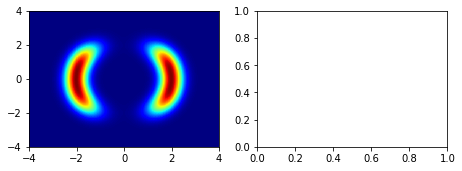

In [15]:
x = torch.linspace(-4, 4, 500)
y = torch.linspace(-4, 4, 500)
X, Y = torch.meshgrid(x, y)
data = torch.stack([X.flatten(), Y.flatten()], dim=1)
density = density_func(data)

z = torch.randn(size=(50000, 2))
samples, _ = flow(z)

figure, axes = plt.subplots(1, 2, figsize=(7.5, 2.5))
# True Density
axes[0].pcolormesh(X, Y, density.reshape(X.shape), cmap='jet')
axes[1].hist2d(samples[:, 0].detach().numpy(), samples[:, 1].detach().numpy(), bins=200, cmap='jet')
# Learned Density
axes[0].set_title('True density')
axes[1].set_title('Learned density')